In [3]:
import investpy

df = investpy.get_stock_historical_data(stock='SAMP',
                                        country='Sri Lanka',
                                        from_date='01/01/2010',
                                        to_date='20/05/2021')
print(df.tail())

            Open  High   Low  Close   Volume Currency
Date                                                 
2021-05-12  50.1  51.4  49.9   50.0   660741      LKR
2021-05-13  49.8  50.7  49.7   50.6   373219      LKR
2021-05-17  50.6  52.0  50.6   51.9   606055      LKR
2021-05-18  52.2  52.3  51.7   52.2  1120518      LKR
2021-05-19  52.2  52.9  51.9   52.7   528819      LKR


In [4]:
### Since we only have 50 request a day, will write data frames to csv file first

df.to_csv('SAMP.csv')

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('SAMP.csv')

In [7]:
df1 = df.reset_index()['Close']

In [8]:
df1[1228:]

1228    234.92
1229    242.59
1230    242.59
1231    241.69
1232    241.69
         ...  
2689     50.00
2690     50.60
2691     51.90
2692     52.20
2693     52.70
Name: Close, Length: 1466, dtype: float64

In [9]:
df1.shape

(2694,)

In [10]:
df1

0       89.31
1       89.72
2       88.80
3       89.62
4       90.43
        ...  
2689    50.00
2690    50.60
2691    51.90
2692    52.20
2693    52.70
Name: Close, Length: 2694, dtype: float64

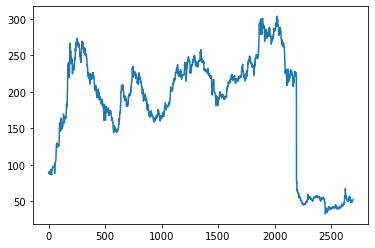

In [11]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [12]:
df1.describe()

count    2694.000000
mean      181.922361
std        73.810573
min        33.000000
25%       157.257500
50%       203.850000
75%       231.190000
max       303.480000
Name: Close, dtype: float64

In [13]:
df1[1228:]

1228    234.92
1229    242.59
1230    242.59
1231    241.69
1232    241.69
         ...  
2689     50.00
2690     50.60
2691     51.90
2692     52.20
2693     52.70
Name: Close, Length: 1466, dtype: float64

In [15]:
### LSTM are sensitive to the scale of the data. So we apply MinMax scaler

In [16]:
import numpy as np

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))

In [20]:
df1.shape

(2694, 1)

In [21]:
df1

array([[0.20818545],
       [0.20970127],
       [0.20629991],
       ...,
       [0.06987578],
       [0.07098492],
       [0.07283348]])

In [22]:
### Splitting data set into train and test split
training_size = int(len(df1) * 0.65)
test_size = len(df1) - training_size
train_data, test_data = df1[0:training_size,:],df1[training_size:len(df1), :1]

In [23]:
training_size, test_size

(1751, 943)

In [25]:
import numpy

# Convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i : (i + time_step)] ### i = 0, 0,1,2,3
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [26]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [27]:
print(x_train), print(y_train)

[[[0.20818545]
  [0.20970127]
  [0.20629991]
  ...
  [0.46029281]
  [0.45947944]
  [0.45781573]]

 [[0.20970127]
  [0.20629991]
  [0.20933156]
  ...
  [0.45947944]
  [0.45781573]
  [0.45533866]]

 [[0.20629991]
  [0.20933156]
  [0.21232623]
  ...
  [0.45781573]
  [0.45533866]
  [0.45079119]]

 ...

 [[0.68995859]
  [0.68533718]
  [0.68071576]
  ...
  [0.68759243]
  [0.68444987]
  [0.68444987]]

 [[0.68533718]
  [0.68071576]
  [0.67916297]
  ...
  [0.68444987]
  [0.68444987]
  [0.68725969]]

 [[0.68071576]
  [0.67916297]
  [0.6637829 ]
  ...
  [0.68444987]
  [0.68725969]
  [0.69069802]]]
[0.45533866 0.45079119 0.44912748 ... 0.68725969 0.69069802 0.7104407 ]


(None, None)

In [28]:
print(x_train.shape), print(y_train.shape)

(1650, 100, 1)
(1650,)


(None, None)

In [29]:
print(x_test.shape), print(y_test.shape)

(842, 100, 1)
(842,)


(None, None)

In [30]:
### Before implementing any kind of LSTM, x_train have to reshape to be [samples, time steps, features] which is required for LSTM
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [31]:
### Create the stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [32]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam")

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
26/26 [==============================] - 26s 499ms/step - loss: 0.0400 - val_loss: 0.0240
Epoch 2/100
26/26 [==============================] - 9s 343ms/step - loss: 0.0035 - val_loss: 0.0191
Epoch 3/100
26/26 [==============================] - 10s 371ms/step - loss: 0.0020 - val_loss: 0.0139
Epoch 4/100
26/26 [==============================] - 10s 393ms/step - loss: 0.0016 - val_loss: 0.0096
Epoch 5/100
26/26 [==============================] - 10s 369ms/step - loss: 0.0013 - val_loss: 0.0071
Epoch 6/100
26/26 [==============================] - 10s 371ms/step - loss: 0.0012 - val_loss: 0.0060
Epoch 7/100
26/26 [==============================] - 10s 370ms/step - loss: 0.0011 - val_loss: 0.0055
Epoch 8/100
26/26 [==============================] - 10s 374ms/step - loss: 0.0012 - val_loss: 0.0052
Epoch 9/100
26/26 [==============================] - 10s 391ms/step - loss: 0.0011 - val_loss: 0.0052
Epoch 10/100
26/26 [==============================] - 10s 385ms/step - loss: 0.0011

26/26 [==============================] - 6s 231ms/step - loss: 3.0993e-04 - val_loss: 0.0015
Epoch 79/100
26/26 [==============================] - 6s 235ms/step - loss: 3.0696e-04 - val_loss: 0.0017
Epoch 80/100
26/26 [==============================] - 6s 233ms/step - loss: 3.4033e-04 - val_loss: 0.0015
Epoch 81/100
26/26 [==============================] - 6s 232ms/step - loss: 3.9157e-04 - val_loss: 0.0015
Epoch 82/100
26/26 [==============================] - 6s 232ms/step - loss: 3.2960e-04 - val_loss: 0.0014
Epoch 83/100
26/26 [==============================] - 6s 232ms/step - loss: 2.8210e-04 - val_loss: 0.0015
Epoch 84/100
26/26 [==============================] - 7s 272ms/step - loss: 3.1264e-04 - val_loss: 0.0015
Epoch 85/100
26/26 [==============================] - 7s 271ms/step - loss: 2.7268e-04 - val_loss: 0.0013
Epoch 86/100
26/26 [==============================] - 7s 274ms/step - loss: 3.0131e-04 - val_loss: 0.0013
Epoch 87/100
26/26 [==============================] - 7s 27

In [35]:
import tensorflow as tf

In [36]:
tf.__version__

'2.5.0'

In [47]:
### Lets do the prediction and check performance matrics
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [56]:
### Teansform to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [62]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

0.18367452626804925

In [63]:
### Test data RMSE
math.sqrt(mean_squared_error(y_test, test_predict))

0.03381078399391425

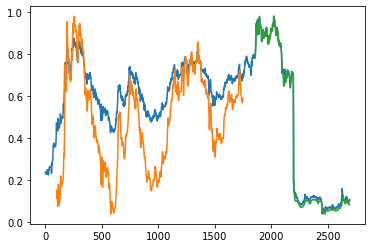

In [64]:
### Plotting
### Shift train prediction for plotting
look_back = 100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back : len(train_predict) + look_back, :] = train_predict
### Shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1 : len(df1)-1, :] = test_predict
# Plot baseline and prediction
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [65]:
len(test_data)

943

In [66]:
x_input = test_data[len(test_data) - 100 : ].reshape(1, -1)
x_input.shape

(1, 100)

In [67]:
x_input = test_data[len(test_data) - 100 : ].reshape(1, -1)

In [68]:
x_input.shape

(1, 100)

In [69]:
temp_input = list(x_input)
temp_input= temp_input[0].tolist()

In [70]:
temp_input

[0.04991126885536823,
 0.04732327713694173,
 0.045104998521147605,
 0.04610322389825494,
 0.044254658385093154,
 0.04299763383614316,
 0.04251700680272108,
 0.04251700680272108,
 0.04055752735876958,
 0.03907867494824016,
 0.03992901508429458,
 0.04214729370008871,
 0.04373706004140787,
 0.044254658385093154,
 0.04806270334220644,
 0.05175983436853002,
 0.05386719905353446,
 0.05261017450458444,
 0.05238834664300504,
 0.052684117125110924,
 0.05175983436853002,
 0.05053978112984325,
 0.04898698609878735,
 0.05423691215616683,
 0.059154096421177166,
 0.07394262052647146,
 0.08196539485359361,
 0.08255693581780538,
 0.08011682934043182,
 0.09242827565808931,
 0.08751109139307897,
 0.0838139603667554,
 0.12817953268263826,
 0.11830819284235433,
 0.10167110322389825,
 0.10045104998521148,
 0.09734545992309968,
 0.08625406684412895,
 0.0838139603667554,
 0.08011682934043182,
 0.08196539485359361,
 0.09242827565808931,
 0.08566252587991718,
 0.08104111209701273,
 0.07579118603963325,
 0.0751

In [71]:
# Demonstrate prediction for next 10 days
from numpy import array

lst_output = []
n_steps = 100
i = 0

while (i < 30):
    
    if (len(temp_input) > 100):
#         print(temp_input)
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape(1, n_steps, 1)
        # print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        # print(temp_input)
        lst_output.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose = 0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i = i + 1
        
print(lst_output)

[0.08621977]
101
1 day input [0.04732328 0.045105   0.04610322 0.04425466 0.04299763 0.04251701
 0.04251701 0.04055753 0.03907867 0.03992902 0.04214729 0.04373706
 0.04425466 0.0480627  0.05175983 0.0538672  0.05261017 0.05238835
 0.05268412 0.05175983 0.05053978 0.04898699 0.05423691 0.0591541
 0.07394262 0.08196539 0.08255694 0.08011683 0.09242828 0.08751109
 0.08381396 0.12817953 0.11830819 0.1016711  0.10045105 0.09734546
 0.08625407 0.08381396 0.08011683 0.08196539 0.09242828 0.08566253
 0.08104111 0.07579119 0.07516267 0.07516267 0.07331411 0.06776841
 0.06776841 0.07024549 0.07054126 0.06902544 0.06625259 0.06407128
 0.06407128 0.06717687 0.06902544 0.06776841 0.06869269 0.06902544
 0.06839692 0.06839692 0.0676575  0.08096717 0.08022774 0.08799172
 0.08762201 0.08799172 0.07763975 0.07579119 0.07135463 0.07763975
 0.07727004 0.08429459 0.08244602 0.07948832 0.07800946 0.07763975
 0.07579119 0.06913635 0.06839692 0.06654836 0.06359065 0.05730553
 0.06137238 0.05878438 0.06285123 

9 day output [[0.11836985]]
10 day input [0.03992902 0.04214729 0.04373706 0.04425466 0.0480627  0.05175983
 0.0538672  0.05261017 0.05238835 0.05268412 0.05175983 0.05053978
 0.04898699 0.05423691 0.0591541  0.07394262 0.08196539 0.08255694
 0.08011683 0.09242828 0.08751109 0.08381396 0.12817953 0.11830819
 0.1016711  0.10045105 0.09734546 0.08625407 0.08381396 0.08011683
 0.08196539 0.09242828 0.08566253 0.08104111 0.07579119 0.07516267
 0.07516267 0.07331411 0.06776841 0.06776841 0.07024549 0.07054126
 0.06902544 0.06625259 0.06407128 0.06407128 0.06717687 0.06902544
 0.06776841 0.06869269 0.06902544 0.06839692 0.06839692 0.0676575
 0.08096717 0.08022774 0.08799172 0.08762201 0.08799172 0.07763975
 0.07579119 0.07135463 0.07763975 0.07727004 0.08429459 0.08244602
 0.07948832 0.07800946 0.07763975 0.07579119 0.06913635 0.06839692
 0.06654836 0.06359065 0.05730553 0.06137238 0.05878438 0.06285123
 0.06100266 0.06137238 0.0621118  0.06322094 0.06654836 0.0621118
 0.0621118  0.06285123 

17 day output [[0.149662]]
18 day input [0.05238835 0.05268412 0.05175983 0.05053978 0.04898699 0.05423691
 0.0591541  0.07394262 0.08196539 0.08255694 0.08011683 0.09242828
 0.08751109 0.08381396 0.12817953 0.11830819 0.1016711  0.10045105
 0.09734546 0.08625407 0.08381396 0.08011683 0.08196539 0.09242828
 0.08566253 0.08104111 0.07579119 0.07516267 0.07516267 0.07331411
 0.06776841 0.06776841 0.07024549 0.07054126 0.06902544 0.06625259
 0.06407128 0.06407128 0.06717687 0.06902544 0.06776841 0.06869269
 0.06902544 0.06839692 0.06839692 0.0676575  0.08096717 0.08022774
 0.08799172 0.08762201 0.08799172 0.07763975 0.07579119 0.07135463
 0.07763975 0.07727004 0.08429459 0.08244602 0.07948832 0.07800946
 0.07763975 0.07579119 0.06913635 0.06839692 0.06654836 0.06359065
 0.05730553 0.06137238 0.05878438 0.06285123 0.06100266 0.06137238
 0.0621118  0.06322094 0.06654836 0.0621118  0.0621118  0.06285123
 0.06506951 0.06987578 0.07098492 0.07283348 0.08621977 0.08825966
 0.0910963  0.09451821

25 day output [[0.1797348]]
26 day input [0.08196539 0.08255694 0.08011683 0.09242828 0.08751109 0.08381396
 0.12817953 0.11830819 0.1016711  0.10045105 0.09734546 0.08625407
 0.08381396 0.08011683 0.08196539 0.09242828 0.08566253 0.08104111
 0.07579119 0.07516267 0.07516267 0.07331411 0.06776841 0.06776841
 0.07024549 0.07054126 0.06902544 0.06625259 0.06407128 0.06407128
 0.06717687 0.06902544 0.06776841 0.06869269 0.06902544 0.06839692
 0.06839692 0.0676575  0.08096717 0.08022774 0.08799172 0.08762201
 0.08799172 0.07763975 0.07579119 0.07135463 0.07763975 0.07727004
 0.08429459 0.08244602 0.07948832 0.07800946 0.07763975 0.07579119
 0.06913635 0.06839692 0.06654836 0.06359065 0.05730553 0.06137238
 0.05878438 0.06285123 0.06100266 0.06137238 0.0621118  0.06322094
 0.06654836 0.0621118  0.0621118  0.06285123 0.06506951 0.06987578
 0.07098492 0.07283348 0.08621977 0.08825966 0.0910963  0.09451821
 0.09829984 0.10226572 0.10630212 0.11034679 0.11437199 0.11836985
 0.12234171 0.1262917

In [72]:
# 100 element with newly predicted day
day_new = np.arange(1, 101)
#next thirty days
day_pred = np.arange(101, 131)

In [73]:
import matplotlib.pyplot as plt

In [74]:
len(df1)

2694

In [75]:
df3 = df1.tolist()
df3.extend(lst_output)

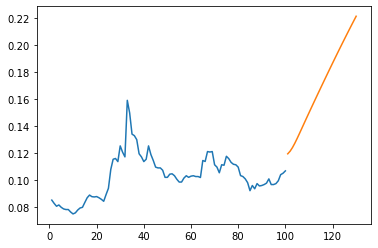

In [76]:
plt.plot(day_new, scaler.inverse_transform(df1[len(df1)-100:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

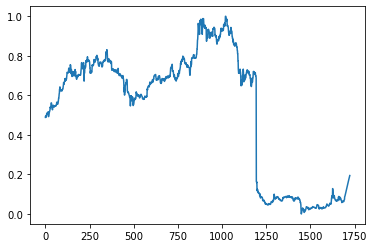

In [77]:
df3 = df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1000:])